In [1]:
from google.colab import files
uploaded = files.upload()

Saving mnist-original.mat to mnist-original.mat


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [16]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [17]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


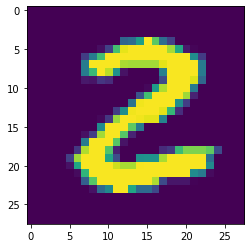

In [19]:
plt.imshow(X_train[25])
plt.show()

In [20]:
print(Y_train[25])

2


In [21]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [22]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [23]:
X_train = X_train/255
X_test = X_test/255

In [24]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),  
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(10, activation='sigmoid')])

In [25]:
model.compile(optimizer='adam', 
                         loss = 'sparse_categorical_crossentropy', 
                         metrics=['accuracy'])

In [26]:
model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0683 - accuracy: 0.9788


In [27]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9704
0.9703999757766724


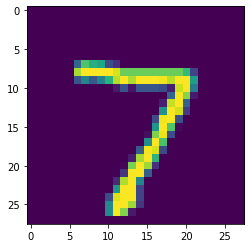

In [28]:
plt.imshow(X_test[0])
plt.show()

In [29]:
print(Y_test[0])

7


In [30]:
Y_pred = model.predict(X_test)
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

313/313 [==============================] - 1s 2ms/step
7
